# On the mutual information 

**Abstract:** Measure the mutual information between variables and how this condition the inference of labels from data is a very interesting and non-trivial topic. To illustrate some of these ideas, imagine we have digit images $X_i\in X$ (e.g., MNIST) and their labels $y_i \in y$. How can we measure the mutual information between the data $X$ and the labels $y$? How this mutual information can be used as a bound on the classification performance? What happens when training a dnn in terms of the mutual information. 

Refs:
1. Hjelm, R. D. (2018). Mutual Information Neural Estimation.
2. Shwartz-Ziv, R., & Tishby, N. (2017). Opening the Black Box of Deep Neural Networks via Information. 
3. Kraskov, A., & Grassberger, P. (2004). Estimating mutual information.

In [1]:
import numpy as np
import sys
sys.path.append('../libs')
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Create some toy data

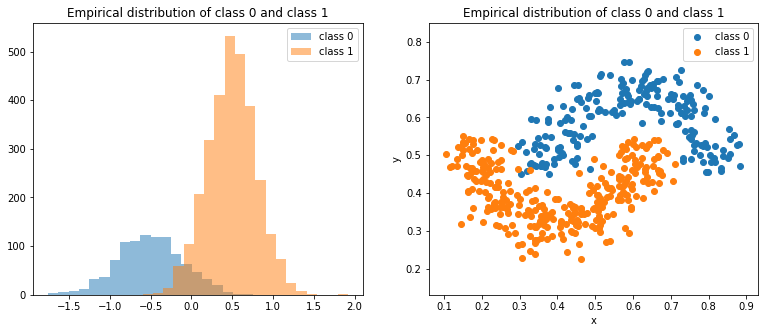

In [2]:
# toy example 1:
plt.figure(figsize=[13,5])
from data import toy_data1, toy_data2
plt.subplot(121); 
X,y = toy_data1(n0=1000, n1=3000, verbose=1)
# toy example 2:
plt.subplot(122);
X,y = toy_data2(n0=200, n1=300, verbose=1)

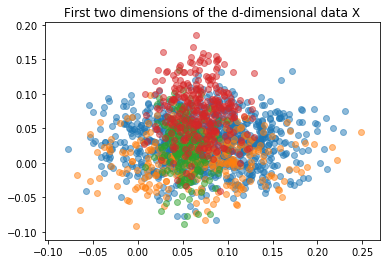

In [21]:
# toy example 3: N multivariate gaussians in a d dimensional space. 
from data import toy_data3
n = (1000,300,200,300)
X,y = toy_data3(n=n,d=100)
for c,nn in enumerate(n):
    plt.scatter(X[y==c,0],X[y==c,1], alpha=.5)
plt.title('First two dimensions of the d-dimensional data X');

## Compute the MI using discrete bins

In [52]:
x1 = np.random.random((1,20))
x2 = np.random.random((5,5))

n_bins = (10,3)  
k_x1 = n_bins[0]
k_x2 = n_bins[1]

num_samples, dim_x1 = x1.shape
num_samples_x2, dim_x2 = x2.shape

min_x1 = x1.min(axis=0)
max_x1 = x1.max(axis=0)
min_x2 = x2.min(axis=0)
max_x2 = x2.max(axis=0)

print('For RV (X1,X2) {} samples are provided (each has dim. {}/{})'.format(num_samples, dim_x1, dim_x2))

x1_discrete_domain = np.zeros((dim_x1, k_x1))
for i in range(dim_x1):
    x1_discrete_domain[i,:] = np.linspace(min_x1[i], max_x1[i], k_x1)
    
x2_discrete_domain = np.zeros((dim_x2, k_x2))
for i in range(dim_x2):
    x2_discrete_domain[i,:] = np.linspace(min_x2[i], max_x2[i], k_x2)
    
for i in range(num_samples):
    # Find the coords in the discrete domain for x1
    x = x1[i,:]  # row vector with the sample x1[i]
    a = np.dot(np.transpose(x), np.ones((1,k_x1)))  # dim_x1 x k_x1 aux matrix replicating the vec x1[i]
    a -= x1_discrete_domain
    a = np.abs(a)  
    i, j = np.unravel_index(a.argmin(), a.shape)



For RV (X1,X2) 1 samples are provided (each has dim. 20/5)


ValueError: shapes (20,) and (1,10) not aligned: 20 (dim 0) != 1 (dim 0)

In [56]:
np.ones((1,k_x1))
x.transpose().shape

(20,)

In [ ]:

d = X.shape[1]
k = 10
x_min = X.min(axis=0)
x_max = X.max(axis=0)
grid_x1 = 
for i in range(d):
[np.linspace(x_min[i], x_max[i], k+1) for i in arange(x_min)])
d

In [22]:
# Compute the mutual information between x1 and x2 using discrete bins to compute p(X1,X2)
mi = MI_bin(x1=X,x2=y)


NameError: name 'MI_bin' is not defined

array([1.69955314, 0.9244765 ])

array([[1.45358065, 0.79871653],
       [0.79871653, 0.44383849]])

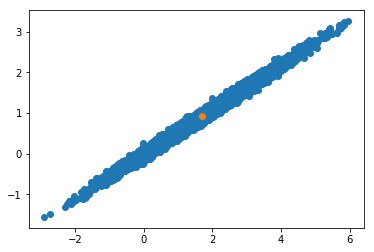

In [28]:
plt.scatter(x[0,:],x[1,:])
plt.scatter(mu[0], mu[1